In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [9]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [11]:
df = pd.get_dummies(df,columns=["State"])
df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [14]:
from datasist.structdata import detect_outliers
indx=detect_outliers(df,0,df.columns)

In [16]:
x = df.drop('Profit', axis=1)
y = df.Profit

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [27]:
models={
    'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(n_neighbors=5),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(n_estimators=15),
    'XGBR':XGBRegressor()
}


In [28]:

for name,model in models.items():
    print(f'using:{name}')
    model.fit(x_train,y_train)
    print(f'training accuracy: {model.score(x_train,y_train)}')
    print(f'testing accuracy: {model.score(x_test,y_test)}')
    print('_'*30)

using:LR
training accuracy: 0.9395310270349774
testing accuracy: 0.9717752402663644
______________________________
using:KNN
training accuracy: 0.727701637242137
testing accuracy: 0.6334488704074293
______________________________
using:SVR
training accuracy: -0.00718371288970876
testing accuracy: -0.02352134206803047
______________________________
using:DT
training accuracy: 1.0
testing accuracy: 0.8401205189561243
______________________________
using:RF
training accuracy: 0.9874992615139884
testing accuracy: 0.9558317311513725
______________________________
using:XGBR
training accuracy: 0.9999999999996774
testing accuracy: 0.9243163162758123
______________________________


<AxesSubplot:>

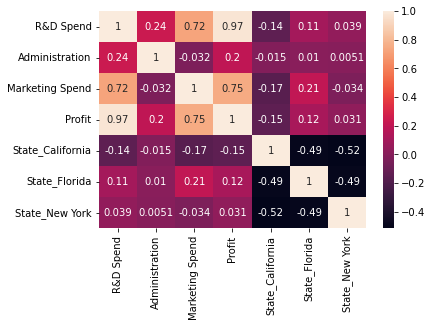

In [29]:
sns.heatmap(df.corr(),annot=True)

In [93]:
df = pd.read_csv('Houses prices.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [95]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [96]:
df['Month'] = df.date.dt.month
df['Day'] = df.date.dt.day


In [97]:
df.drop(['country','street','date'], axis=1, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
 15  Month          4600 non-null   int64  
 16  Day            4600 non-null   int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 61

In [99]:
df = pd.get_dummies(df,columns=['city','statezip'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,0,0,0,1,0,0,0,0,0


In [101]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

for i in [ 'waterfront', 'view', 'condition']:
    df, _ = smote.fit_resample(df, df[i])

In [102]:
x = df.drop('price', axis=1)
y = df['price']
from sklearn.model_selection import train_test_split
x_train, x_test,y_train , y_test = train_test_split(x,y, test_size=0.2 )
x_train


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
15283,4.070574,2.785287,3113,7300,1.767644,0,2,3,2008,1105,...,0,0,0,0,0,0,0,0,0,0
66206,4.897761,3.693890,4176,19135,1.612220,0,3,5,2674,1501,...,0,0,0,0,0,0,0,0,0,0
2975,3.000000,2.250000,1790,10209,1.000000,0,0,3,1290,500,...,0,0,0,0,0,0,0,0,0,0
24146,2.399528,1.000000,955,20040,1.000000,0,0,1,809,145,...,0,0,0,0,0,0,0,0,0,0
22645,3.282178,1.000000,1354,25204,1.000000,0,0,1,886,467,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27112,2.271974,1.000000,926,14765,1.067993,0,0,1,926,0,...,0,0,0,0,0,0,0,0,0,0
67535,4.056327,2.556327,3245,7556,1.528163,0,1,5,1915,1329,...,0,0,0,0,0,0,0,0,0,0
31807,2.000000,1.000000,831,12980,1.000000,0,0,1,831,0,...,0,0,0,0,0,0,0,0,0,0
54907,4.802518,3.348741,3310,15165,1.197482,0,1,5,2078,1231,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [108]:
models={
    'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(n_neighbors=5),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(n_estimators=15),
    'XGBR':XGBRegressor()
}

In [109]:
for name,model in models.items():
    print(f'using:{name}')
    model.fit(x_train,y_train)
    print(f'training accuracy: {model.score(x_train,y_train)}')
    print(f'testing accuracy: {model.score(x_test,y_test)}')
    print('_'*30)

using:LR
training accuracy: 0.893869400058963
testing accuracy: -3.9429527939988154e+20
______________________________
using:KNN
training accuracy: 0.9864960269832941
testing accuracy: 0.9895213159033494
______________________________
using:SVR
training accuracy: -0.17786750425927877
testing accuracy: -0.17666450543820833
______________________________
using:DT
training accuracy: 0.9999999999999714
testing accuracy: 0.929437547007599
______________________________
using:RF
training accuracy: 0.9968953542095004
testing accuracy: 0.9830359205113123
______________________________
using:XGBR
training accuracy: 0.9938014116589392
testing accuracy: 0.9863680504127345
______________________________


In [111]:
model=KNeighborsRegressor()
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.9895213159033494

In [112]:
import joblib

In [113]:
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')
joblib.dump(x.columns,'features.h5')

['features.h5']